In [1]:
import csv
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [11]:
dates = [] #x
prices = [] #y

In [12]:
#1 data acqusition
def get_data(filename):
	with open(filename,'r') as csvfile:
		csvFileReader = csv.reader(csvfile)
		next(csvFileReader) #skipping column names
		for row in csvFileReader:
			dates.append(int(row[0]))
			prices.append(float(row[1]))
	return

In [13]:
#create model
def show_plot(dates,prices):
    linear_mod = linear_model.LinearRegression()
    dates = np.reshape(dates,(len(dates),1)) # converting to matrix of n X 1
    prices = np.reshape(prices,(len(prices),1))
    linear_mod.fit(dates,prices) #fitting the data points in the model
    plt.scatter(dates,prices,color='yellow') #plotting the initial datapoints
    plt.plot(dates,linear_mod.predict(dates),color='blue',linewidth=3) #plotting the line made by linear regression
    plt.show()
    return

In [14]:
def predict_price(dates,prices,x):
    linear_mod = linear_model.LinearRegression() #defining the linear regression model
    dates = np.reshape(dates,(len(dates),1)) # converting to matrix of n X 1
    prices = np.reshape(prices,(len(prices),1))
    linear_mod.fit(dates,prices) #fitting the data points in the model
    predicted_price =linear_mod.predict(x)
    return predicted_price[0][0],linear_mod.coef_[0][0] ,linear_mod.intercept_[0]

In [15]:
get_data('msft.csv') # calling get_data method by passing the csv file to it
print(dates)
print(prices)
print ("\n")

[23, 19, 12, 5, 28, 21, 14, 7, 31, 24, 17, 10, 3, 26, 18, 12, 5, 29, 22, 15, 8, 1, 22, 15, 8, 1, 25, 18, 11, 4]
[137.41, 139.44, 136.4, 136.63, 137.0, 132.63, 132.4, 123.85, 126.98, 126.52, 124.11, 126.39, 129.9, 122.62, 120.94, 119.81, 118.95, 116.56, 116.17, 110.99, 113.02, 111.76, 107.79, 106.2, 102.87, 106.26, 106.75, 101.9, 101.64, 101.29]




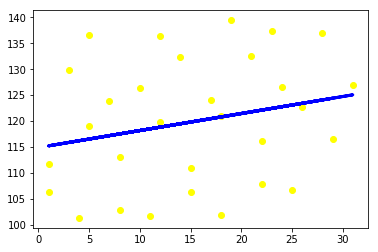

In [16]:
show_plot(dates,prices)

In [18]:
predicted_price, coefficient, constant = predict_price(dates,prices, np.array([1]).reshape(-1, 1))
print("The stock open price for 29th Feb is: $",str(predicted_price))
print("The regression coefficient is ",str(coefficient),", and the constant is ", str(constant))
print("the relationship equation between dates and prices is: price = ",str(coefficient),"* date + ",str(constant))

The stock open price for 29th Feb is: $ 115.19782909242596
The regression coefficient is  0.3284083189321255 , and the constant is  114.86942077349384
the relationship equation between dates and prices is: price =  0.3284083189321255 * date +  114.86942077349384
